In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

from sklearn.model_selection import cross_val_score
from sklearn import (
    metrics, 
    linear_model, 
    ensemble,
    neighbors,
)

In [59]:
df = pd.read_csv('../../data/titanic_train.csv')

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
features = ['Pclass', 'Fare', 'Parch', 'SibSp']
target = 'Survived'

X = df[features]
y = df[target]

In [62]:
def evaluate_models(X, y):
    
    cls = ensemble.RandomForestClassifier(n_estimators=50) 
    cls.fit(X, y)

    print 'Random Forest:', cross_val_score(cls, X, y, scoring='roc_auc', cv=5).mean()
    
    cls = linear_model.LogisticRegression() 
    cls.fit(X, y)

    print 'Logistic Regression:', cross_val_score(cls, X, y, scoring='roc_auc', cv=5).mean()
    
    cls = ensemble.GradientBoostingClassifier(n_estimators=50) 
    cls.fit(X, y)

    print 'GBDT:', cross_val_score(cls, X, y, scoring='roc_auc', cv=5).mean()
    
    cls = neighbors.KNeighborsClassifier(n_neighbors=5)
    cls.fit(X, y)

    print 'KNN:', cross_val_score(cls, X, y, scoring='roc_auc', cv=5).mean()

In [63]:
evaluate_models(X, y)

Random Forest: 0.727256688403
Logistic Regression: 0.706209190026
GBDT: 0.755219476375
KNN: 0.698138660947


In [64]:
df['Sex_value'] = df['Sex'].map(lambda x: 0 if x == 'male' else 1)

In [65]:
# Equivalent to the line above
def convert_to_value(x):
    if x == 'male':
        return 0
    else:
        return 1

In [66]:
features = ['Pclass', 'Fare', 'Parch', 'SibSp', 'Sex_value']
target = 'Survived'

X = df[features]
y = df[target]

evaluate_models(X, y)

Random Forest: 0.845574914304
Logistic Regression: 0.831267335596
GBDT: 0.856609649843
KNN: 0.788960600159


In [67]:
df['Age'].isnull().sum()

177

In [68]:
df['Age_fixed'] = df['Age'].fillna(value=df['Age'].median())

In [69]:
features = ['Pclass', 'Fare', 'Parch', 'SibSp', 'Sex_value', 'Age_fixed']
target = 'Survived'

X = df[features]
y = df[target]

evaluate_models(X, y)

Random Forest: 0.859845091498
Logistic Regression: 0.848148698795
GBDT: 0.860580957988
KNN: 0.720424599002


In [70]:
df['Age_fixed_normal'] = df['Age_fixed'].map(lambda x: (x - df['Age_fixed'].mean()) / df['Age_fixed'].std())

In [71]:
features = ['Pclass', 'Fare', 'Parch', 'SibSp', 'Sex_value', 'Age_fixed_normal']
target = 'Survived'

X = df[features]
y = df[target]

evaluate_models(X, y)

Random Forest: 0.856806410855
Logistic Regression: 0.847280566286
GBDT: 0.860580957988
KNN: 0.787972191234


In [72]:
df['Embarked_fixed'] = df['Embarked'].dropna()

In [73]:
df = pd.get_dummies(df, prefix='Embk', columns=['Embarked_fixed'], drop_first=True)

In [74]:
features = ['Pclass', 'Fare', 'Parch', 'SibSp', 'Sex_value', 'Age_fixed_normal', 'Embk_Q', 'Embk_S']
target = 'Survived'

X = df[features]
y = df[target]

evaluate_models(X, y)

Random Forest: 0.852935154117
Logistic Regression: 0.848663549548
GBDT: 0.868129398113
KNN: 0.784630341639


In [75]:
df.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [76]:
df['Name'].sample(10)

136                         Newsom, Miss. Helen Monypeny
10                       Sandstrom, Miss. Marguerite Rut
187        Romaine, Mr. Charles Hallace ("Mr C Rolmane")
869                      Johnson, Master. Harold Theodor
533               Peter, Mrs. Catherine (Catherine Rizk)
700    Astor, Mrs. John Jacob (Madeleine Talmadge Force)
220                       Sunderland, Mr. Victor Francis
308                                  Abelson, Mr. Samuel
752                     Vande Velde, Mr. Johannes Joseph
238                      Pengelly, Mr. Frederick William
Name: Name, dtype: object

In [77]:
df['Title'] = df['Name'].map(lambda x: re.search(r'\s[A-Z][a-z]+\.', x).group())

In [78]:
df['Title'] = df['Title'].map(lambda x: {' Ms.': ' Miss.'}.get(x, x))

In [79]:
df = pd.get_dummies(df, prefix='Title', columns=['Title'], drop_first=True)

In [80]:
titles = [x for x in df.columns if re.search(r'Title\_', x)]

features = ['Pclass', 'Fare', 'Parch', 'SibSp', 'Sex_value', 'Age_fixed_normal', 'Embk_Q', 'Embk_S'] + titles
target = 'Survived'

X = df[features]
y = df[target]

evaluate_models(X, y)

Random Forest: 0.859178302535
Logistic Regression: 0.867586014063
GBDT: 0.86633605939
KNN: 0.804640798989


In [81]:
df['Has_cabin'] = df['Cabin'].map(lambda x: 0 if pd.isnull(x) else 1)

In [82]:
titles = [x for x in df.columns if re.search(r'Title\_', x)]

features = ['Pclass', 'Fare', 'Parch', 'SibSp', 'Sex_value', 'Age_fixed', 'Embk_Q', 'Embk_S', 'Has_cabin'] + titles
target = 'Survived'

X = df[features]
y = df[target]

evaluate_models(X, y)

Random Forest: 0.865869444344
Logistic Regression: 0.86939726342
GBDT: 0.870879610175
KNN: 0.743359907766


In [83]:
from sklearn import tree

cls = tree.DecisionTreeClassifier(max_depth=4)
cls.fit(X, y)

tree.export_graphviz(cls, out_file='tree.dot')

In [85]:
import os
os.system('dot -Tpng tree.dot -o tree.png')

0

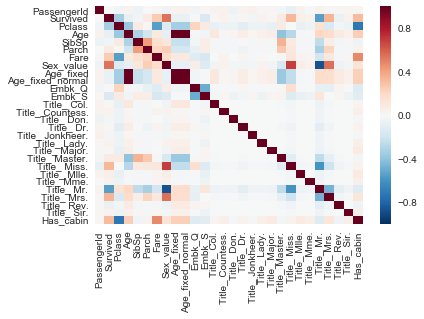

In [86]:
sns.heatmap(df.corr())

In [87]:
from sklearn.cluster import KMeans

In [88]:
features = ['Pclass', 'Sex_value', 'Age_fixed_normal', 'Embk_Q', 'Embk_S', 'Has_cabin', 'Fare']

In [89]:
labels = KMeans(n_clusters=2).fit(df[features]).labels_
print '2 clusters:', metrics.silhouette_score(df[features], labels, metric='euclidean')

2 clusters: 0.832532873881


In [90]:
labels = KMeans(n_clusters=3).fit(df[features]).labels_
print '3 clusters:', metrics.silhouette_score(df[features], labels, metric='euclidean')

3 clusters: 0.761597272299


In [91]:
labels = KMeans(n_clusters=4).fit(df[features]).labels_
print '4 clusters:', metrics.silhouette_score(df[features], labels, metric='euclidean')

4 clusters: 0.757014523946


In [92]:
# 2 clusters seems to perform the best
labels = KMeans(n_clusters=2).fit(df[features]).labels_

# Combine the cluster labels with our features
data = pd.concat([df, pd.Series(labels)], axis=1)

In [93]:
# Add in the age and survived features so that we can get descriptive stats about them too
features_to_describe = features + ['Age_fixed', 'Survived']

In [94]:
# Descriptive stats about cluster 0
data[data[0] == 0][features_to_describe].describe()

,Pclass,Sex_value,Age_fixed_normal,Embk_Q,Embk_S,Has_cabin,Fare,Age_fixed,Survived
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,2.391408,0.334129,-0.010793,0.091885,0.739857,0.192124,22.411942,29.221062,0.361575
std,0.792451,0.471967,0.995352,0.289037,0.438975,0.394205,20.827218,12.959185,0.480744
min,1.000000,0.000000,-2.222908,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,2.000000,0.000000,-0.565419,0.000000,0.000000,0.000000,7.895800,22.000000,0.000000
50%,3.000000,0.000000,-0.104579,0.000000,1.000000,0.000000,13.000000,28.000000,0.000000
75%,3.000000,1.000000,0.433068,0.000000,1.000000,0.000000,27.720800,35.000000,1.000000
max,3.000000,1.000000,3.889370,1.000000,1.000000,1.000000,93.500000,80.000000,1.000000


In [95]:
# Descriptive stats about cluster 1
data[data[0] == 1][features_to_describe].describe()

,Pclass,Sex_value,Age_fixed_normal,Embk_Q,Embk_S,Has_cabin,Fare,Age_fixed,Survived
count,53.0,53.000000,53.000000,53.0,53.000000,53.000000,53.000000,53.000000,53.000000
mean,1.0,0.641509,0.170650,0.0,0.452830,0.811321,187.032858,31.583396,0.735849
std,0.0,0.484146,1.066276,0.0,0.502533,0.394998,96.462925,13.882590,0.445099
min,1.0,0.000000,-2.184504,0.0,0.000000,0.000000,106.425000,0.920000,0.000000
25%,1.0,0.000000,-0.565419,0.0,0.000000,1.000000,120.000000,22.000000,0.000000
50%,1.0,1.000000,0.049035,0.0,0.000000,1.000000,151.550000,30.000000,1.000000
75%,1.0,1.000000,0.817102,0.0,1.000000,1.000000,227.525000,40.000000,1.000000
max,1.0,1.000000,2.660463,0.0,1.000000,1.000000,512.329200,64.000000,1.000000
